In [59]:
%matplotlib inline
import matplotlib
import numpy as np
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Arial']
matplotlib.rcParams['font.sans-serif'] = ['System Font', 'Verdana', 'Arial']
matplotlib.rcParams['figure.dpi'] = 108

In [60]:
def spec(x, xa, A, mu, sig, N):
    y = (A * np.exp(-(x - mu) ** 2 / (2 * sig ** 2))
    + A * np.exp(-(x - mu + 2 * xa) ** 2 / (2 * sig ** 2))
    + A * np.exp(-(x - mu - 2 * xa) ** 2 / (2 * sig ** 2))
    + 0.5 * N)
    return y

In [61]:
# Some basic parameters
N = 80
G = 50
va = 15
x = np.arange(0, N, dtype=np.float32) / N * 2 * va - va

A = 0.5
mu = 11
sig = 5
An = 0.1 * A

In [62]:
yy = np.zeros((G, N))
vr = np.zeros(G)
wd = np.zeros(G)
for k in np.arange(yy.shape[0]):
    mu = 4.0 * np.cos(0.13 * k + 0.5 * np.pi) + 3.0;
    sig = 0.5 + 0.08 * k;
    y = spec(x, va, A, mu, sig, An)
    y = (0.5 * np.random.rand(N) + 0.75) * y
    n = An * (np.random.rand(N) - 0.5)
    y = y + n
    yy[k, :] = y
    vr[k] = mu
    wd[k] = sig

In [64]:
len(wdd)

49

# Plot

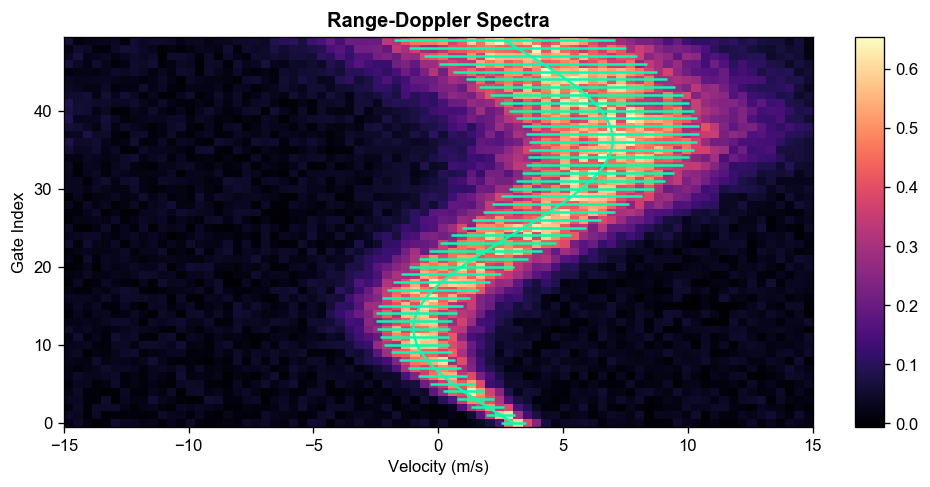

In [73]:
bgColor = (0.89, 0.87, 0.83)

fig = matplotlib.pyplot.figure(figsize=(8, 4), dpi=120)
# fig.suptitle('Range-Doppler Spectra', fontweight='bold')
w = 6
h = 6.5
rect = [0.14, 0.1, 0.8 * h / w, 0.8]
rect = [round(x * 72.0) / 72.0 + 0.5 / 72.0 for x in rect]
ax = matplotlib.pyplot.axes(rect, facecolor=bgColor)

im = matplotlib.pyplot.imshow(yy, extent=(-va, va, -0.5, G - 0.5), aspect=0.5 * 1.0 * G / N, cmap='magma', origin='lower', axes=ax)
matplotlib.pyplot.errorbar(vr, np.arange(G), xerr=wd, color=[0, 1, 0.7])
matplotlib.pyplot.xlabel('Velocity (m/s)')
matplotlib.pyplot.ylabel('Gate Index')
matplotlib.pyplot.title('Range-Doppler Spectra', fontweight='bold')

cax = fig.add_axes((rect[0] + rect[2] + 0.0001, rect[1], 0.03, rect[3]))
matplotlib.pyplot.colorbar(ax=ax, cax=cax, orientation='vertical')
